### Loads input volumetric data and convert in 2D images training format
* input image -> WH
* output image -> WH

In [1]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import helpers as H
from tqdm import tqdm

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

# Dataset directories
LOW_DIR = "singlecoil_train_3D_images_48x/low/"
HIGH_DIR = "singlecoil_train_3D_images_48x/high/"

LOW_DIR_PATH = os.path.join(TRAIN_DATASET_PATH, LOW_DIR)
HIGH_DIR_PATH = os.path.join(TRAIN_DATASET_PATH, HIGH_DIR)
SAVE_DATA_PATH = os.path.join(TRAIN_DATASET_PATH, "singlecoil_train_3D_images_48x")
LOW_DIR_PATH, HIGH_DIR_PATH

('/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low/',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high/')

In [2]:
w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    print(img.shape[-1])
    print(type(img.shape[-1]))
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img


def change_depth(img):

    img_start = img[:,:,:4]
    
    mid = int(img.shape[-1]/2)
    img_middle = img[:,:,mid-10:mid+10]
    
    img_end = img[:,:,-4:]
    img = np.concatenate((img_start, img_middle, img_end), axis=2)
    return img


def show_slices(data, slice_nums, cmap=None):
    data = np.moveaxis(data, 2, 0)
    fig = plt.figure(figsize=(16, 16))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)        

#### Check number of contents

In [3]:
len(os.listdir(LOW_DIR_PATH)), len(os.listdir(HIGH_DIR_PATH))

(8, 8)

In [4]:
low_full_paths = ["{}/{}".format(LOW_DIR_PATH,l) for l in H.sort_paths(os.listdir(LOW_DIR_PATH))]
high_full_paths = ["{}/{}".format(HIGH_DIR_PATH,h) for h in H.sort_paths(os.listdir(HIGH_DIR_PATH))]

len(low_full_paths), len(high_full_paths)

(8, 8)

In [5]:
low_full_paths[:4]

['/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low//1.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low//2.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low//3.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/low//4.npy']

In [6]:
high_full_paths[:4]

['/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high//1.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high//2.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high//3.npy',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_3D_images_48x/high//4.npy']

In [7]:
# Make folder for low and high res

LOW_DIR_2D = "singlecoil_train_2D_images/low/"
HIGH_DIR_2D = "singlecoil_train_2D_images/high/"

H.create_directory("{}/{}".format(TRAIN_DATASET_PATH, LOW_DIR_2D))
H.create_directory("{}/{}".format(TRAIN_DATASET_PATH, HIGH_DIR_2D))

In [8]:
LOW_DIR_2D_PATH = os.path.join(TRAIN_DATASET_PATH, LOW_DIR_2D)
HIGH_DIR_2D_PATH = os.path.join(TRAIN_DATASET_PATH, HIGH_DIR_2D)
LOW_DIR_2D_PATH, HIGH_DIR_2D_PATH

('/home/hasib/MRI-reconstruction/dataset/singlecoil_train_2D_images/low/',
 '/home/hasib/MRI-reconstruction/dataset/singlecoil_train_2D_images/high/')

#### Low MRI 3D to 2D image slices

In [10]:
c=0
total_slices = 0

for l in tqdm(low_full_paths[:]):
    img_3d = np.load("{}".format(l))
    img_3d = np.moveaxis(img_3d, 0, 2)
    slices = img_3d.shape[-1]
    total_slices+=slices
    
    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[:,:,i]
        #print(img[10:12, 20:24])
        plt.imsave("{}/{}_{}.jpg".format(LOW_DIR_2D_PATH, c, i), img, cmap='gray')
        img = None
        
    img_3d = None
    c+=1
    
print("Total slices: {}".format(total_slices))

100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

Total slices: 293


#### HIGH MRI VOLUMES

In [12]:
c=0
total_slices = 0

for l in tqdm(high_full_paths[:]):
    img_3d = np.load("{}".format(l))
    img_3d = np.moveaxis(img_3d, 0, 2)
    slices = img_3d.shape[-1]
    total_slices+=slices
    
    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[:,:,i]
        #print(img[10:12, 20:24])
        plt.imsave("{}/{}_{}.jpg".format(HIGH_DIR_2D_PATH, c, i), img, cmap='gray')
        img = None
        
    img_3d = None
    c+=1
    
print("Total slices: {}".format(total_slices))

100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

Total slices: 293


In [13]:
print("Done!")

Done!


### Load a slice

In [30]:
import cv2
import imageio

high_full_paths = ["{}/{}".format(HIGH_DIR_2D_PATH,h) for h in H.sort_paths(os.listdir(HIGH_DIR_2D_PATH))]
len(high_full_paths)

293

By default image is loaded as RGB even though it is grayscale

In [31]:
high_full_paths[118]

'/home/hasib/MRI-reconstruction/dataset/singlecoil_train_2D_images/high//1_20.jpg'

In [32]:
img_org = cv2.imread(high_full_paths[118])
img_org[10:12, 20:24]

array([[[10, 10, 10],
        [16, 16, 16],
        [43, 43, 43],
        [56, 56, 56]],

       [[21, 21, 21],
        [25, 25, 25],
        [42, 42, 42],
        [65, 65, 65]]], dtype=uint8)

From array we can see the channels are duplicate, so we take info from 1st channel only

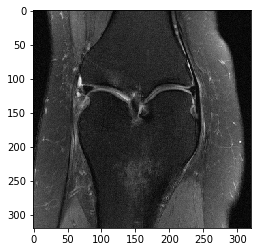

In [33]:
plt.imshow(img_org)

Before saving:
`array([[1.01124897e-05, 1.00766865e-05, 9.92884725e-06, 1.27582252e-05],
       [9.29892940e-06, 1.15329321e-05, 8.09639550e-06, 1.14528148e-05]],
      dtype=float32)`

In [34]:
img_gray = cv2.imread(high_full_paths[118], 0)
img_gray[10:12, 20:24]

array([[10, 16, 43, 56],
       [21, 25, 42, 65]], dtype=uint8)

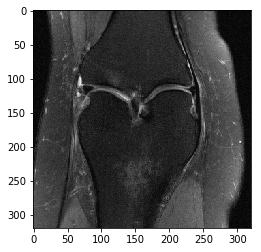

In [35]:
plt.imshow(img_gray, cmap='gray')

Check image range

In [36]:
x = img_gray.flatten()
print(max(x), min(x))

255 0


Normalize

In [37]:
img_gray = img_gray.astype('float32')
img_gray /= 255
img_gray[10:12, 20:24]

array([[0.03921569, 0.0627451 , 0.16862746, 0.21960784],
       [0.08235294, 0.09803922, 0.16470589, 0.25490198]], dtype=float32)

In [38]:
x = img_gray.flatten()
print(max(x), min(x))

1.0 0.0


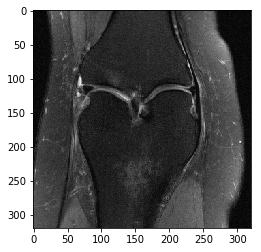

In [39]:
plt.imshow(img_gray, cmap='gray')

In [47]:
print("Done!")

Done!


### During test time:
* load from *.h5 files and convert and save to npy
* for each npy file
    make folder of npy file name
    convert each slice and save in folder
* Now we have X number of test volume folders which have all slices
* Run 2D model on each folder(npy file) and reconstruct output volume